In [1]:
pip install deepxde

In [2]:
# load libraries
import tensorflow as tf
import deepxde as dde
import numpy as np
import matplotlib.pyplot as plt
import math as m

g = tf.constant(9.8)
c = tf.constant(0.05)

def ode_system(t, u):
    du_t = dde.grad.jacobian(u, t)
    return du_t - g + c*u**2

def boundary(x, on_boundary):
    return on_boundary

def func(t):
  return 0
geom = dde.geometry.TimeDomain(0, 10)

ic = dde.IC(geom, func, boundary)

# Reference solution to compute the error
def true_solution(t):
  return 14.0 * np.tanh(0.7 * t)

data = dde.data.PDE(geom,
                    ode_system,
                    ic,
                    num_domain = 50,
                    num_boundary = 5,
                    train_distribution = "uniform",
                    solution = true_solution,
                    num_test = 100)

layer_size = [1] + [32] + [1]
activation = "tanh"
initializer = "Glorot uniform"

NN = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, NN)
model.compile("adam", lr = 0.001)

Using backend: tensorflow.compat.v1
Other supported backends: tensorflow, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Instructions for updating:
non-resource variables are not supported in the long term


Compiling model...
Building feed-forward neural network...
'build' took 0.051340 s

'compile' took 0.300159 s



Training model...

Step      Train loss              Test loss               Test metric
0         [6.68e+01, 0.00e+00]    [6.69e+01, 0.00e+00]    []  
1000      [1.03e-01, 7.72e-05]    [7.42e-02, 7.72e-05]    []  
2000      [1.27e-02, 5.80e-07]    [1.13e-02, 5.80e-07]    []  
3000      [6.31e-03, 3.74e-07]    [5.23e-03, 3.74e-07]    []  
4000      [1.89e-03, 2.66e-08]    [1.61e-03, 2.66e-08]    []  
5000      [4.86e-04, 5.71e-09]    [4.02e-04, 5.71e-09]    []  
6000      [2.35e-04, 2.19e-09]    [2.18e-04, 2.19e-09]    []  

Best model at step 6000:
  train loss: 2.35e-04
  test loss: 2.18e-04
  test metric: []

'train' took 10.361449 s



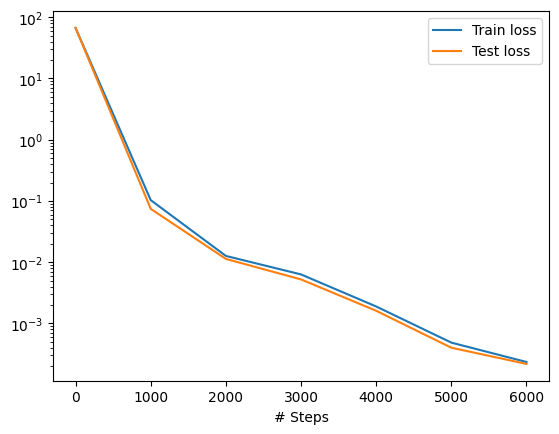

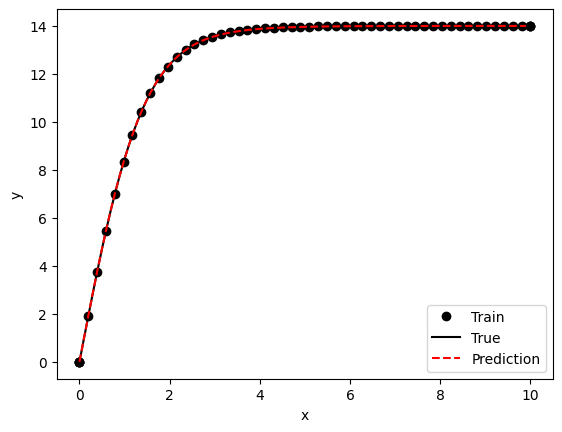

In [3]:
losshistory, train_state = model.train(epochs = 6000)
dde.saveplot(losshistory, train_state, issave = False, isplot = True)

In [4]:
# # Functional Version of the Code
# import tensorflow as tf
# import deepxde as dde
# import numpy as np
# import matplotlib.pyplot as plt
# import math as m
# # Define initial and final time
# t0 = 0
# tf = 20

# # Define boundary conditions

# g = tf.constant(9.8)

# def ode_system(t, u):
#     du_t = dde.grad.jacobian(u, t)
#     return du_t - g + u**2

# def boundary(t, on_initial):
#     return on_initial and np.isclose(t[0], 0)

# geom = dde.geometry.TimeDomain(t0, tf)

# ic = dde.IC(geom, lambda t: 0, boundary)

# # Reference solution to compute the error
# def true_solution(t):
#   return 3.1305*np.tanh(3.1305*t)
#   # return np.log(np.cosh(3.1305*t))


# data = dde.data.PDE(geom,
#                     ode_system,
#                     ic,
#                     num_domain = 30,
#                     num_boundary = 2,
#                     solution = true_solution,
#                     num_test = 100)

# layer_size = [1] + [32] + [1]
# activation = "tanh"
# initializer = "Glorot uniform"

# NN = dde.maps.FNN(layer_size, activation, initializer)

# model = dde.Model(data, NN)
# model.compile("adam", lr = 0.001)